In [1]:
cd G:\dd-resource\slides\homework\ML\HW2

G:\dd-resource\slides\homework\ML\HW2


# This is an implemetation of stochastic gradient_descent with seven variables.

Max interactions exceeded!
SST is:  0.9758878465301378
SSE is:  0.5412918545105962
theta is:  [[-0.17074505768209894]
 [0.356219472150827]
 [-0.06231676830757543]
 [-0.13263612507901934]
 [0.625865656642821]
 [-0.20649752454838372]
 [0.3306847487593777]
 [0.701904624040503]] loss is:  0.2706459272552981 and the R-square is:  0.4453339526307136


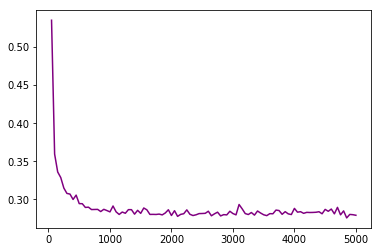

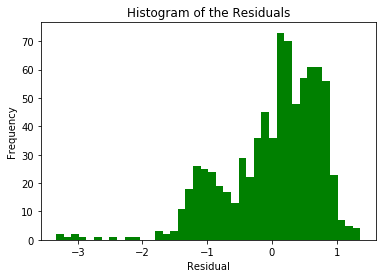

In [2]:
import pandas as pd
import pylab
from pylab import *
import matplotlib.pyplot as plt


# this is the code for problem 3-2, 7 variants are considered.

def stochastic_gradient_descent(alpha, X, y, max_iter):
    iter = 0
    m, n = X.shape  # num of samples: m=804 ; num of varibales : n=8

    theta = np.random.rand(n, 1)  # init theta: shape is (n,1)
    y_predict = X.dot(theta)  # get the predict value of price, X is a matrix

    batch = 10
    # total error, J(theta)
    J = 0.5 * sum([(y_predict[i] - y[i]) ** 2 for i in range(m)]) / m

    itertimes = []
    Jinit = 0
    loss_history = []
    iter_over = False

    # Iterate Loop
    while not iter_over:

        # for each training sample, compute the gradient (d/d_theta j(theta))
        r = np.random.permutation(m)  # 打乱顺序
        X_training = X[r[0:batch], :]  # shape=(batch, n)， 提取打乱顺序后的前batch个sample
        y_training = y[r[0:batch], :]  # shape=(batch, 1)
        y_predict_traing = y_predict[r[0:batch], :]

        # get the gradient
        d_theta = X_training.T.dot(y_predict_traing - y_training) / batch  # (n, 1)

        # update, get the new theta, y_predict, loss in this iteration, store the residuals for analysis
        theta = theta - alpha * d_theta
        y_predict = X.dot(theta)
        loss = 0.5 * sum([(y_predict[i] - y[i]) ** 2 for i in range(m)]) / m
        res = y_predict - y

        J = loss  # update error
        Jinit = Jinit + J
        base = 50

        iter += 1  # update iter
        if (iter % base == 0):
            loss_history.append(Jinit / base)
            itertimes.append(iter)
            Jinit = 0

        if iter == max_iter:
            print("Max interactions exceeded!")
            iter_over = True

    figure(1)
    pylab.plot(itertimes, loss_history, 'k-', color='purple')
    return theta, J, res


def read_data(path):
    data = pd.read_excel(path)
    return data


def process_data(path):
    data = read_data(path)
    return np.asarray(data)


if __name__ == '__main__':
    path = 'G:\dd-resource\slides\homework\ML_project\HW2\car_data.xls'
    data = process_data(path)
    alpha = 0.01 # step in each iteration
    price = data[:, 0].reshape(-1, 1) / 10000  # array, from (804,) to (804, 1)
    avr_price = sum([price[i] for i in range(price.shape[0])]) / price.shape[0]

    X = data[:, list([1, 6, 7, 8, 9, 10, 11])]
    X[:, 0] /= 10000 # preprocess the data: mileage
    X = np.hstack((X, np.ones((X.shape[0], 1)))).astype(np.float64) # add another t0

    theta, loss, res = stochastic_gradient_descent(alpha, X, price, 5000)
    SSE = loss * 2
    SST = sum([(avr_price - price[i]) ** 2 for i in range(price.shape[0])]) / price.shape[0]
    print("SST is: ", SST)
    print("SSE is: ", SSE)
    RS = 1 - SSE / SST
    print("theta is: ", theta, "loss is: ", loss, "and the R-square is: ", RS)

    figure(2)
    plt.hist(res, 40, color='green')
    plt.ylabel('Frequency')
    plt.xlabel('Residual')
    plt.title('Histogram of the Residuals')

    figure(1)
    savefig('fig1')
    figure(2)
    savefig('fig2')
    pylab.show()
